# **Data augmentation**

In [172]:
import os

import pandas as pd

from utils import plots, constants

In [173]:
RESULTS_PATH = constants.TUNING_RAW_FOLDER
RESULTS_CSV = os.path.join(RESULTS_PATH, 'default_pretraining.csv')
FIGSIZE = (20, 6)

In [174]:
results_df = pd.read_csv(RESULTS_CSV)
results_df['date'] = pd.to_datetime(results_df['date'])
results_df['pretraining_epochs'] = results_df['model_name'].str.extract(r'^.*finetuning-epochs_([0-9]+)\.npz')

In [175]:
s2s_gn_es_df = results_df[results_df['model_name'].str.contains('s2s') & results_df['source'].str.contains('gn')]
s2s_es_gn_df = results_df[results_df['model_name'].str.contains('s2s') & results_df['source'].str.contains('es')]
transformer_gn_es_df = results_df[results_df['model_name'].str.contains('transformer') & results_df['source'].str.contains('gn')]
transformer_es_gn_df = results_df[results_df['model_name'].str.contains('transformer') & results_df['source'].str.contains('es')]

**TODO: 2 GPUS + VER VOCAB** 

## **S2S (GN -> ES)** 

f:\my_year2023\PLN\code\MARIAN\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


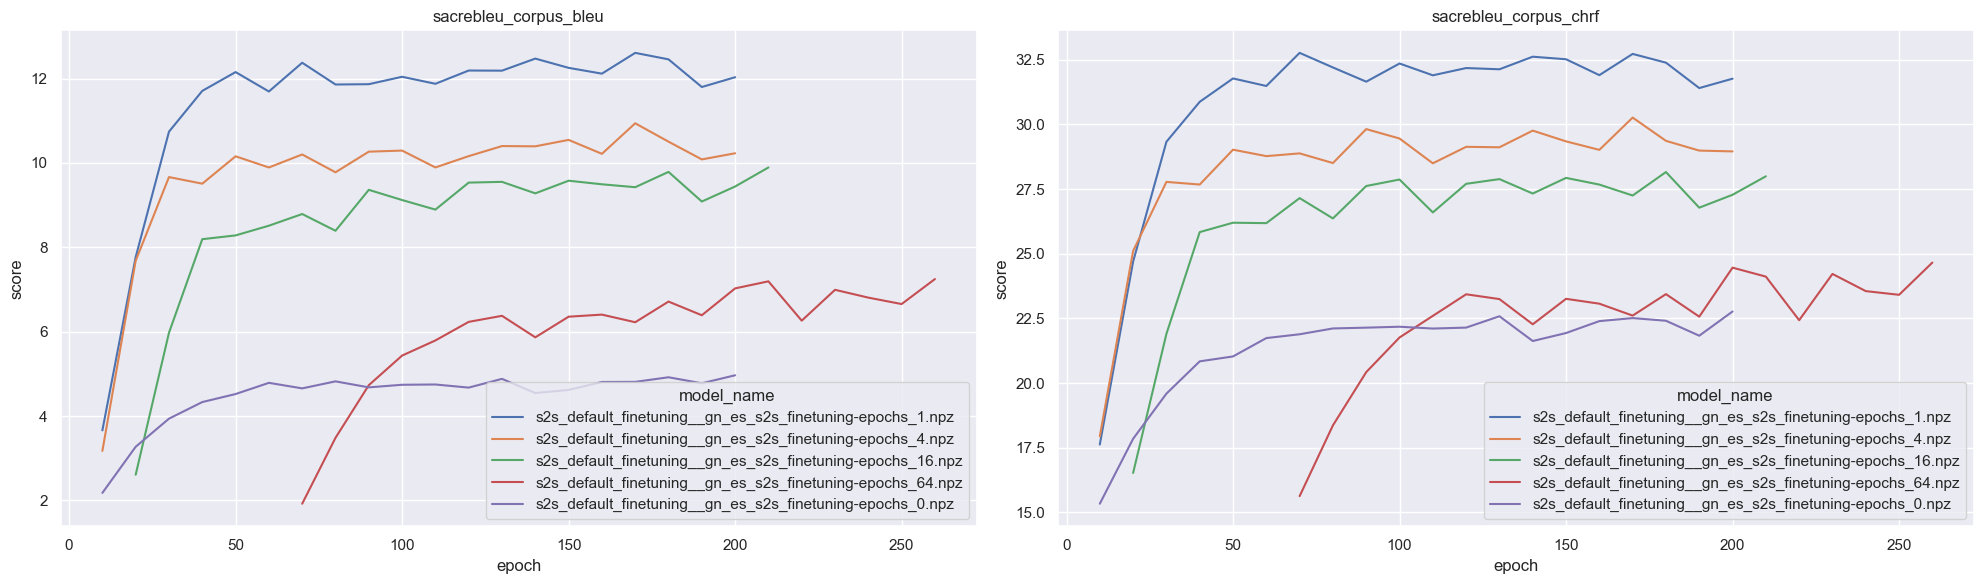

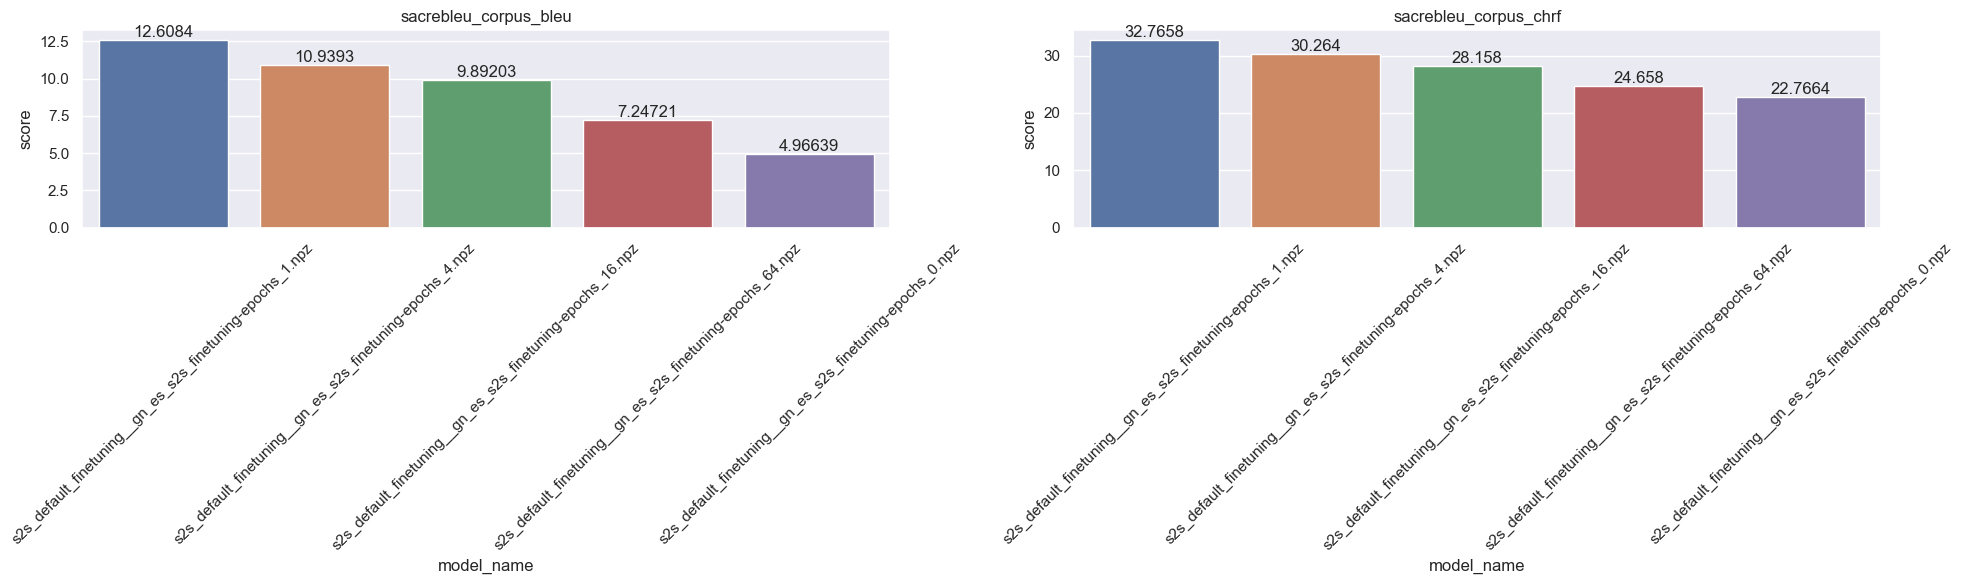

In [176]:
plots.plot_metric_by_epoch_foreach_model(s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(s2s_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

## **S2S (ES -> GN)** 

f:\my_year2023\PLN\code\MARIAN\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


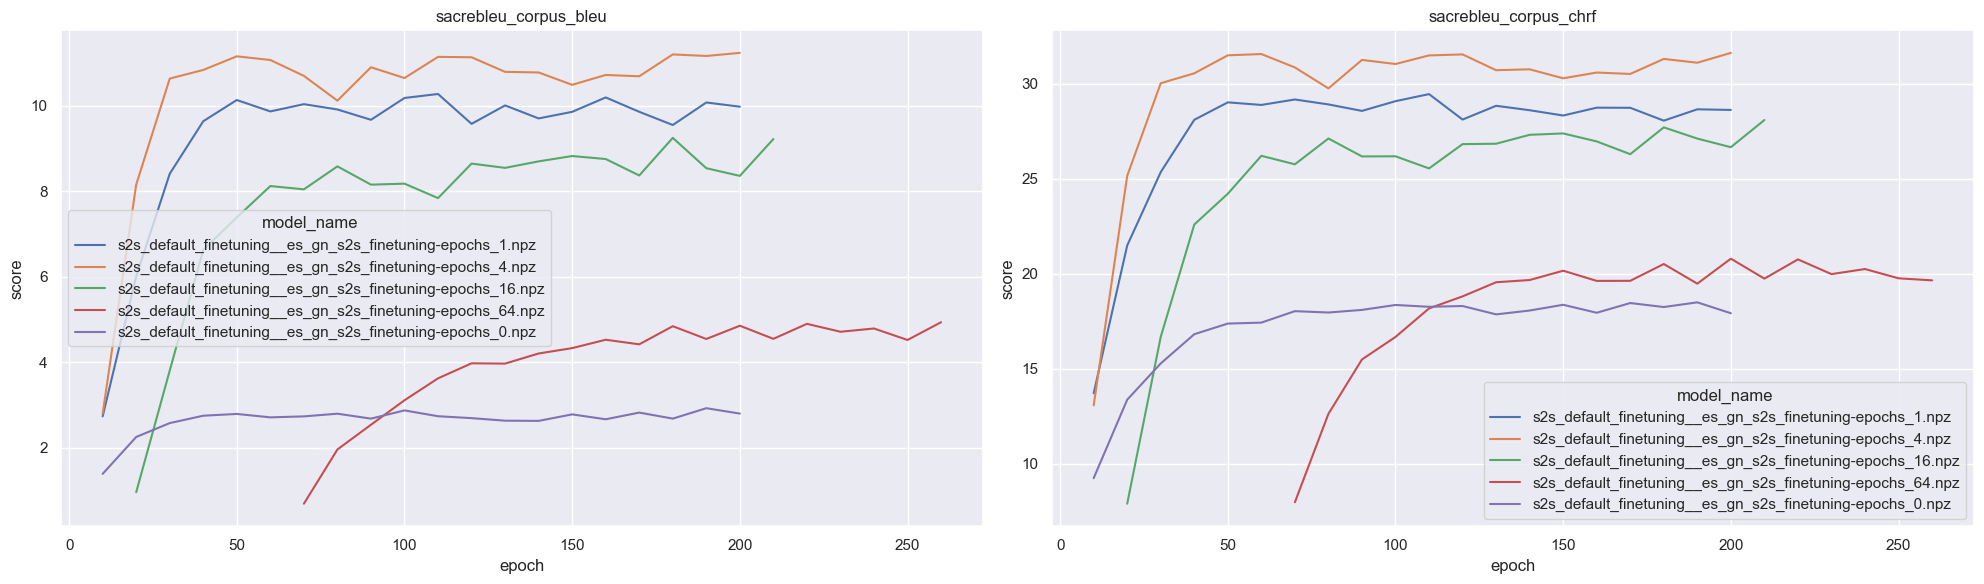

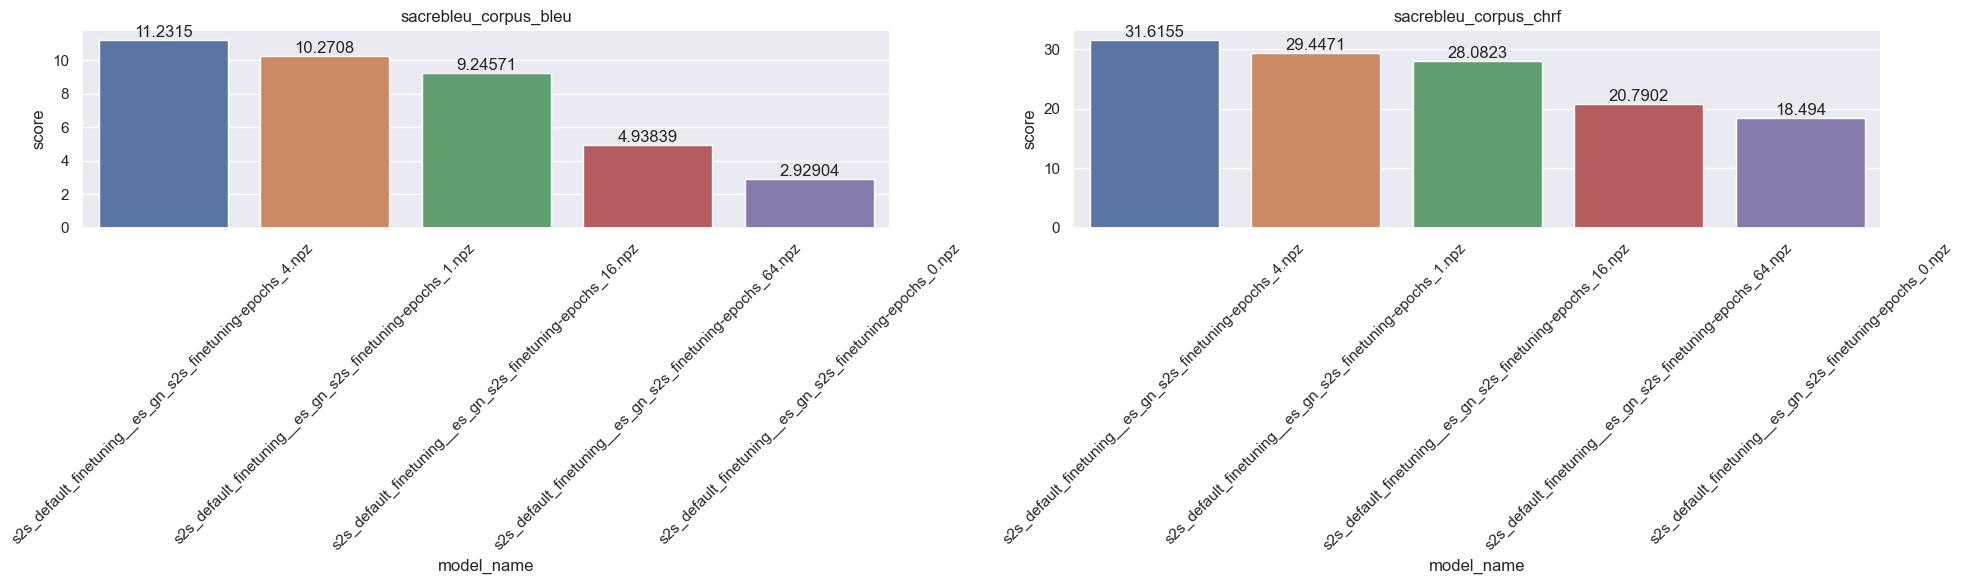

In [177]:
plots.plot_metric_by_epoch_foreach_model(s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(s2s_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

## **TRANSFORMER (GN -> ES)** 

f:\my_year2023\PLN\code\MARIAN\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


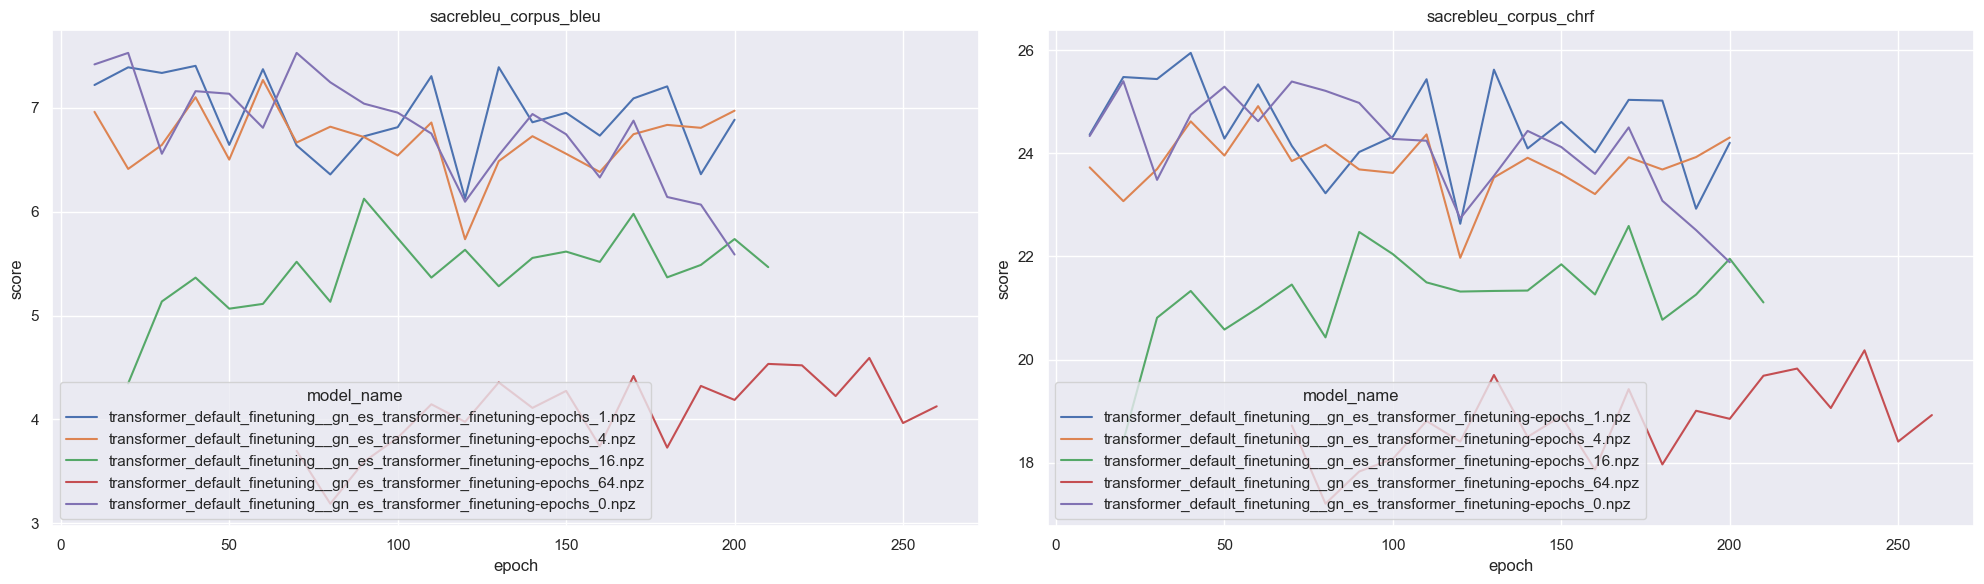

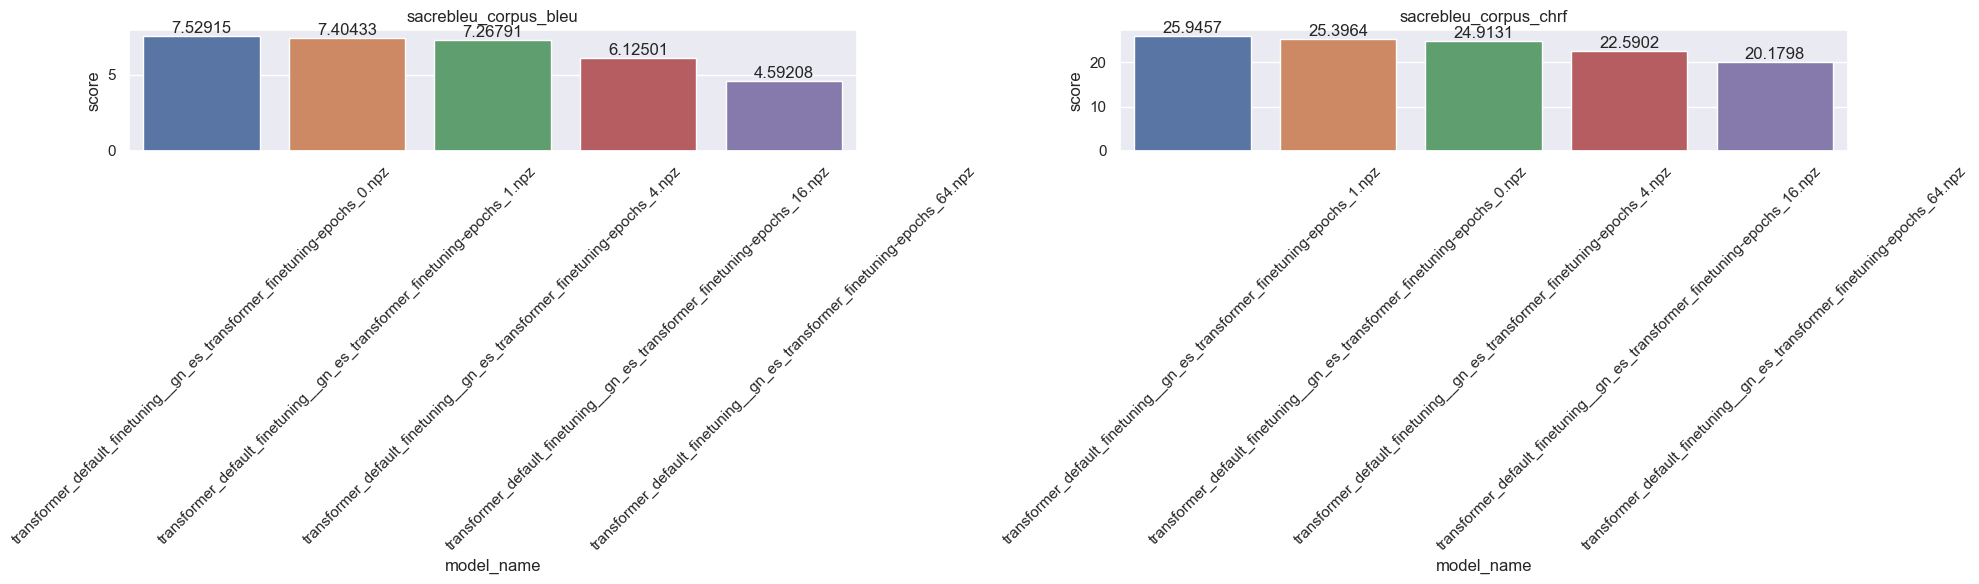

In [178]:
plots.plot_metric_by_epoch_foreach_model(transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(transformer_gn_es_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

## **TRANSFORMER (ES -> GN)** 

f:\my_year2023\PLN\code\MARIAN\notebooks\utils\plots.py:42: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


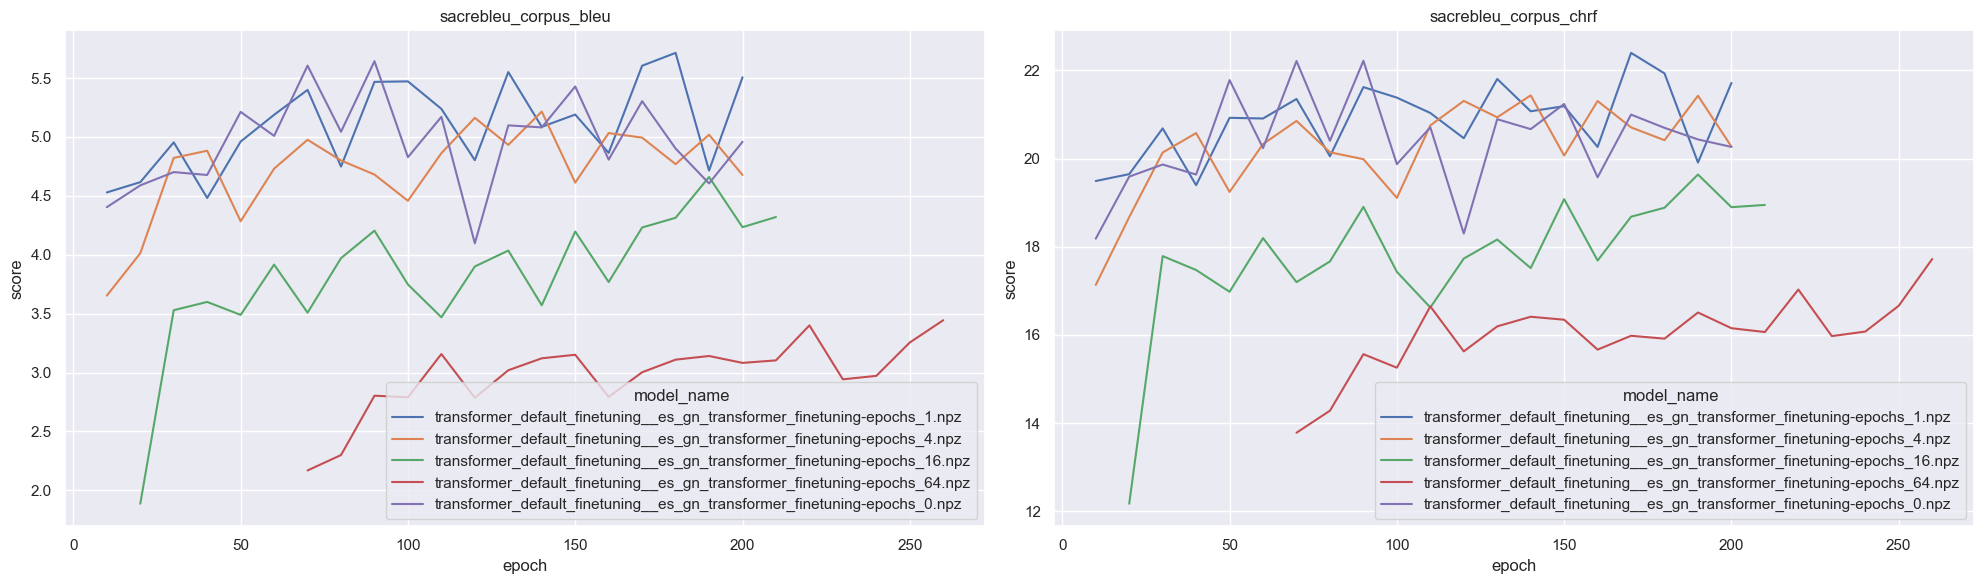

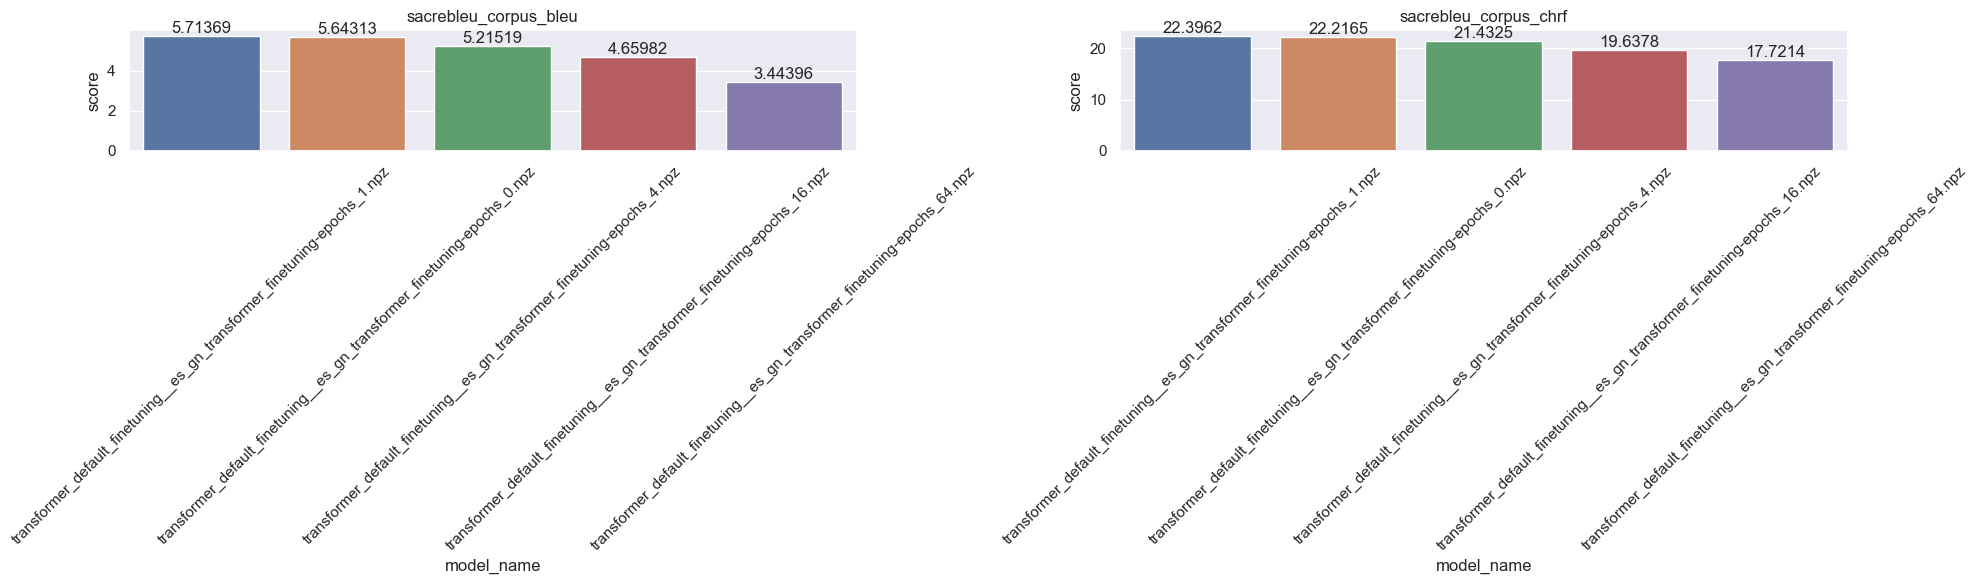

In [179]:
plots.plot_metric_by_epoch_foreach_model(transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE, legend=True);
plots.plot_max_score_by_model(transformer_es_gn_df, metrics=['sacrebleu_corpus_bleu', 'sacrebleu_corpus_chrf'], figsize=FIGSIZE);

## **Summary:**

<Axes: xlabel='epoch', ylabel='score'>

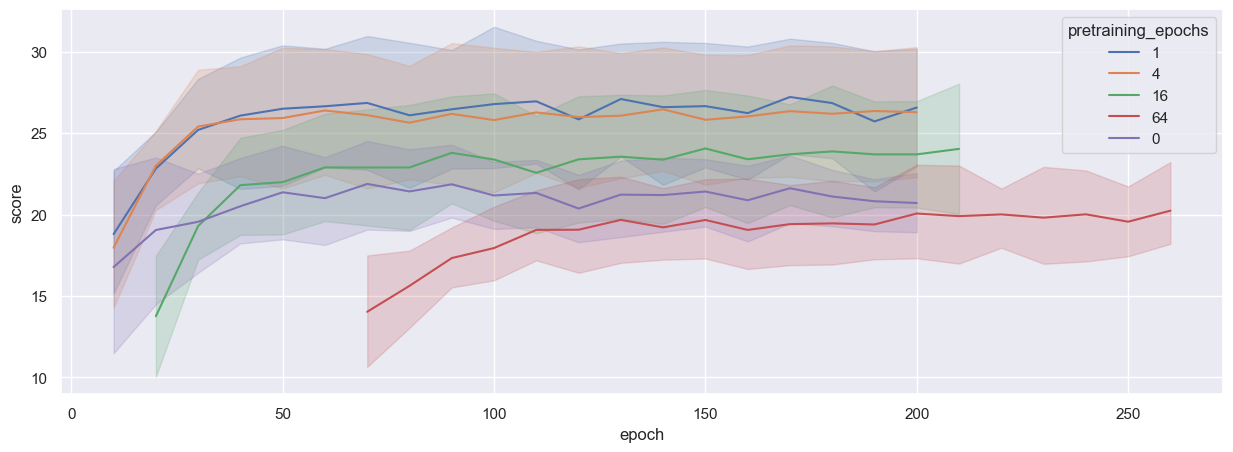

In [192]:
import seaborn as sns; import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15, 5))
sns.lineplot(results_df[results_df['score_type']=='sacrebleu_corpus_chrf'], x='epoch', y='score', hue='pretraining_epochs', ax=ax)

In [182]:
best_epoch_df = results_df.groupby(['model_name', 'source', 'target', 'score_type'])['score'].max().reset_index()
best_epoch_df['model_type'] = best_epoch_df['model_name'].str.extract(r'^([a-z2]+)_')
best_epoch_df['pretraining_epochs'] = best_epoch_df['model_name'].str.extract(r'^.*finetuning-epochs_([0-9]+)\.npz')
best_epoch_df

results_rank = best_epoch_df.groupby(['model_type', 'source', 'target', 'score_type'])['score'].rank(method='average', ascending=False)
best_epoch_df['rank'] = results_rank

f:\AlexisF\python\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\Alexis\AppData\Local\Temp\ipykernel_1684\3868668279.py:12: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


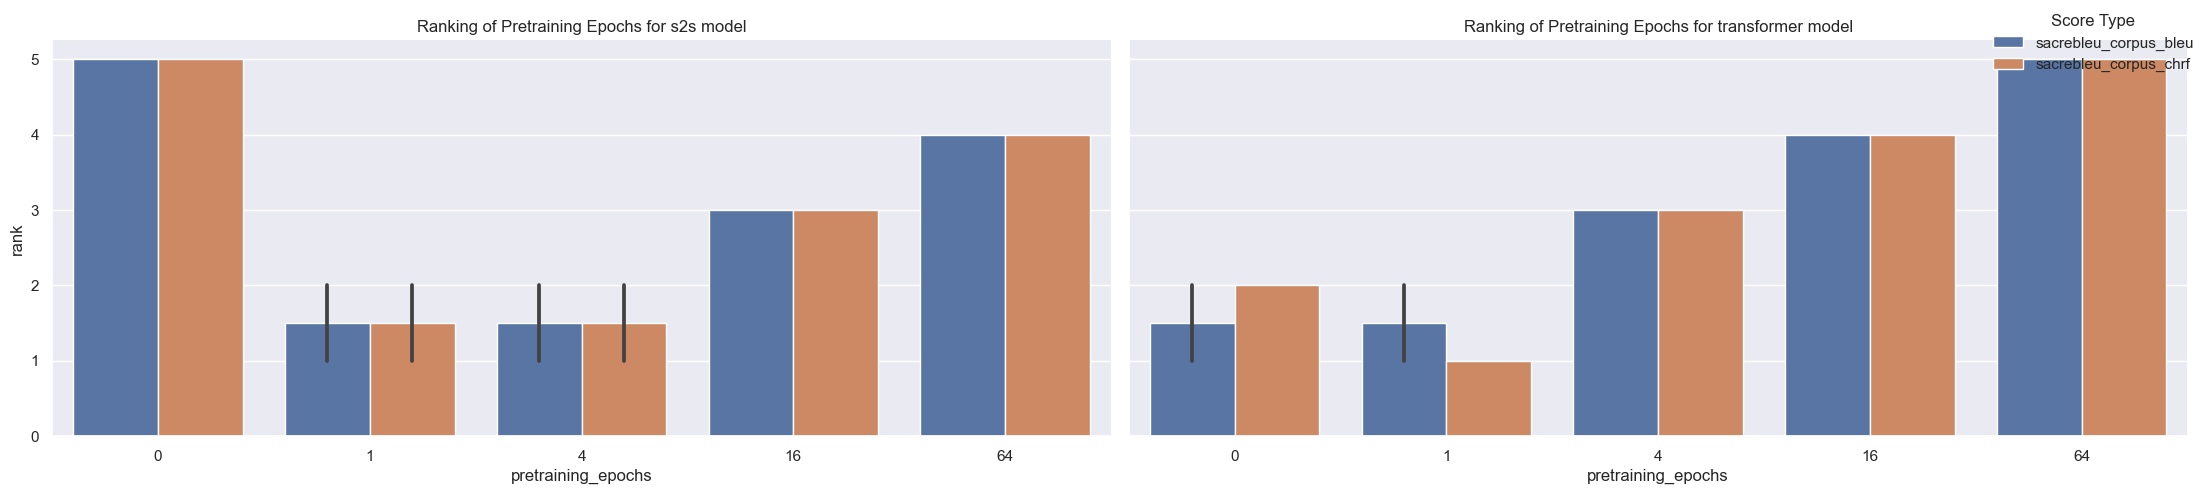

In [195]:
sns.set(style="darkgrid")

g = sns.catplot(
    data=best_epoch_df, y='rank', x='pretraining_epochs',
    hue='score_type', col='model_type', kind='bar',
    height=5, aspect=2, order=list(map(str, [0, 1, 4, 16, 64])),
    legend=False
)

g.set_titles('Ranking of Pretraining Epochs for {col_name} model')
g.add_legend(title='Score Type', loc='upper right')
plt.tight_layout()
plt.show()